## Some simple models for how phased-array far field patterns might look

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1d linear array, no phase variation.

Let the freq/ wavelength for each individual transmitter be given. In this case, the only free parameters are: the spacing between adjacent antennae, and their number (equivalently the total array size)

This is the "envelope function" - describes the relative strength of the *amplitude* (not power) as a function of the angle, theta, from the array normal vector.

In [18]:
def z(theta, s, x):
    return np.exp(-1j * 2 * np.pi * s * x * np.sin(theta))

def amplitude(theta, s, M):
    """Complex amplitude 
        theta = angle in radians from the array normal
        s = spacing between adjacent elements, in units of wavelength
        M = array half-size. total element count = 2M+1"""
    return (z(theta, s, M+1) - z(theta, s, -M)) / (z(theta,s, 1) - 1)

def make_envelope(s, M):
    def env(theta):
        return amplitude(theta, s, M)
    return env

### vary the number of transmitters

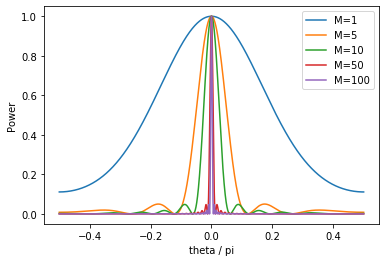

In [70]:
fig, ax = plt.subplots()

Mvals = [1, 5, 10, 50, 100]
Nsamp = int(1e4)
s = 1/4
thetasamp = np.linspace(-np.pi/2, np.pi/2, Nsamp)

for M in Mvals:
    env = make_envelope(s, M)
    P = np.abs(env(thetasamp))**2
    ax.plot(thetasamp / np.pi, P / np.max(P), label=f"M={M}")
    
ax.set_xlabel("theta / pi")
ax.set_ylabel("Power")
plt.legend()



### vary the inter-antenna distance

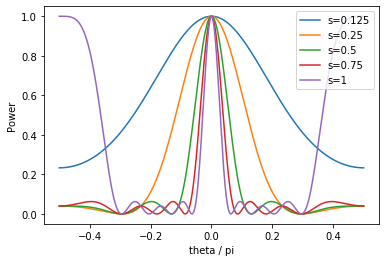

In [72]:
fig, ax = plt.subplots()

M=2
svals = [1/8, 1/4, 1/2, 3/4, 1]
Nsamp = int(1e4)
thetasamp = np.linspace(-np.pi/2, np.pi/2, Nsamp)

for s in svals:
    env = make_envelope(s, M)
    P = np.abs(env(thetasamp))**2
    ax.plot(thetasamp / np.pi, P / np.max(P), label=f"s={s}")
    
ax.set_xlabel("theta / pi")
ax.set_ylabel("Power")
plt.legend()


The intuition to take from this is: **beam width decreases inversely with the array size**. Also, at least in this phase-free case the antenna spacing is not so important for beam diameter.

## Linear array with linear phase gradient

In [77]:
### this is the power distribution for 1d array with added phase gradient

def A0(s, N, alpha, theta):
    """s = spacing between adjacent emitters, measured in wavelengths
        N = total number of emitters
        alpha = phase gradient, in units of wavenumber
        theta = angle from normal at which signal is measured"""
    return (1 - np.cos(2 * np.pi * (np.sin(theta) - alpha) * s * N)) / (1 - np.cos(2 * np.pi * s * (np.sin(theta)-alpha)))

### Some examples of beam steering by changing the phase gradient

The important fact here is: you can scan the beam simply by changing the phase gradient across the array.
However, the response of the beam is not linear:

* the beam center behaves nonlinearly as you approach the edge of the array
* it starts to get a bit wider near the edges

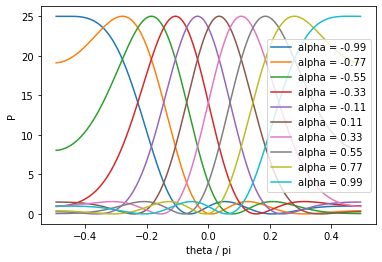

In [91]:
N = 5
s = .25
alpha_vals = np.linspace(-.99, .99, 10)

Nsamp = int(1e4)
thetasamp = np.linspace(-.99 * np.pi/2, .99 *np.pi/2, Nsamp)


fig, ax = plt.subplots()
for alpha in alpha_vals:
    P = A0(s, N, alpha, thetasamp)
    ax.plot(thetasamp/np.pi, P , label=f"alpha = {alpha:.2f}")
ax.set_xlabel("theta / pi")
ax.set_ylabel("P")

plt.legend()
